# Credit scoring Model

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
raw_data = pd.read_csv("credit_card_default_analysis.csv")

In [3]:
raw_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Let's separate our dataset into two samples: w/ goods (default = 0) and bads (default = 1)

In [4]:
good_clients = raw_data[raw_data.default == 0]
bad_clients = raw_data[raw_data.default == 1]

In [5]:
good_clients.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0


In [6]:
bad_clients.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,14,70000,1,2,2,30,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,17,20000,1,1,2,24,0,0,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
21,22,120000,2,2,1,39,0,0,0,0,...,0,632,316,316,316,0,632,316,0,1


In [7]:
good_clients.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

Let's define two functions to draw the graphs. 
The 1st one (draw_dist_plot) will reflect distribution among good_clients and bad_clients according to their Probability of Default(PD).
The 2nd one will reflect dependency btw the variable and our event(default) on the whole dataset

In [8]:
def draw_dist_plot(pos, neg, bins = 15):
    pylab.figure(figsize = (12, 4))

    pylab.subplot(1, 2, 1) # one row, two columns, first plot
    pylab.grid() # True
    pylab.hist(pos, bins = bins, color = 'r')
    pylab.xlabel('Goods')

    pylab.subplot(1, 2, 2) # one row, two columns, 2nd plot
    pylab.grid()
    pylab.hist(neg, bins = bins, color = 'b')
    pylab.xlabel('Bads')

    pylab.show()

In [9]:
def draw_dependency_to_default_plot(var):
    pylab.figure(figsize = (15, 2))

    pylab.scatter(var, raw_data['default'])
    pylab.grid()

    pylab.show()

## LIMIT_BAL variable

From the graphs we can see that distribution differs. Huge part of non-rturned loans is in [0;100 000]. Most of returned loans are concentrated in [100 000; 300 000] pool. 

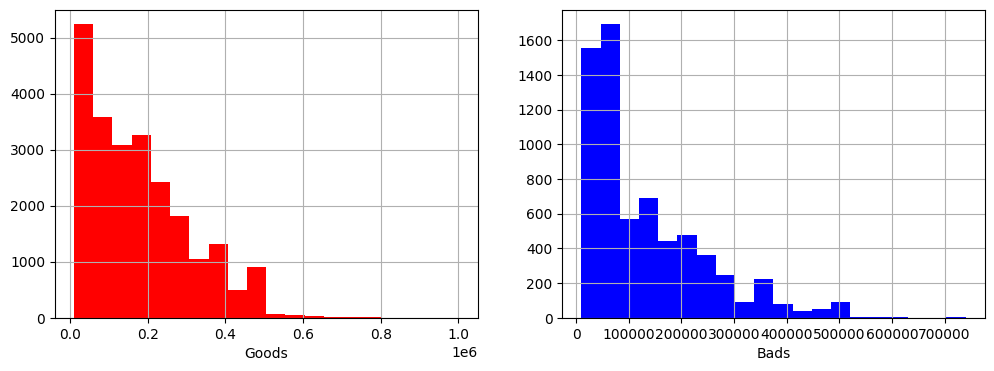

In [10]:
draw_dist_plot(good_clients['LIMIT_BAL'], bad_clients['LIMIT_BAL'], 20)

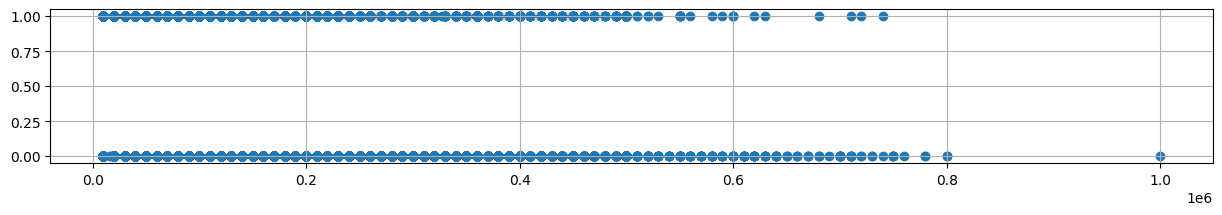

In [11]:
draw_dependency_to_default_plot(raw_data['LIMIT_BAL'])

From graphs we notice: our distribution is not normal. So we can't use parametric criteria. Mann-Whitney rank test could be an option. 

The hypothesis (H0) - the samples came from identical distributions; 
H1 - H0 is not the case.
alpha = 0.05



In [12]:
stats.mannwhitneyu(good_clients['LIMIT_BAL'], bad_clients['LIMIT_BAL'])

MannwhitneyuResult(statistic=95786286.5, pvalue=1.2255485818223303e-189)

The hypothesis H0 is rejected with a very small value of the significance level (pvalue=1.2255485818223303e-189).

We can make an assumption that the size of the credit limit is significant in our credit scoring task.

## Sex

From the graphs we can only notice that share of Male in the 1st subset is less then in the 2nd one. Let's check the statistiacal significance of Sex variable

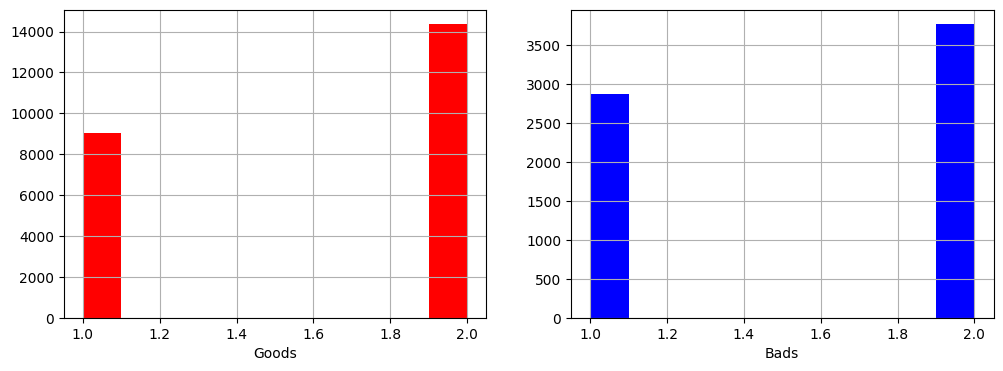

In [16]:
draw_dist_plot(good_clients['SEX'], bad_clients['SEX'], 10)

We replace all 2 values with 0 in order to use Z-criterion for the difference of shares in independent samples in further analysis(we will check the Male share in our subsets). 

In [17]:
good_clients.SEX[good_clients.SEX == 2] = 0
bad_clients.SEX[bad_clients.SEX == 2] = 0

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [25]:
# confidence interval for the difference in the proportions of men in the subsets
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (round(left_boundary, 6), round(right_boundary, 6))

In [19]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [20]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

In [26]:
proportions_diff_confint_ind(good_clients['SEX'], bad_clients['SEX'])

(-0.060548, -0.033635)

The confidence interval does not include 0, so we reject the assumption of equality of medians.

Let us test the hypothesis of distributions equality of our subsets.
H0: p1 = p2
H1: p1 != p2
alpha = 0.05

In [27]:
proportions_diff_z_test(proportions_diff_z_stat_ind(good_clients['SEX'], bad_clients['SEX']))

4.472866521609831e-12

We reject H0 with p = 4.472866521609831e-12

Men share among goods and bads:

In [28]:
float(sum(good_clients['SEX'])) / len(good_clients['SEX']), \
 float(sum(bad_clients['SEX'])) / len(bad_clients['SEX'])

(0.38585002568053417, 0.43294153104279687)

To conclude, men are credited less often, but they more often trap into bad_clients pool. The difference among these shares is statisticaly significant. So the var SEX is also statisticaly significant and should be included into model. 

## Education
0 - phd, 1 - master, 2 - bachelor,3 - high school, 4 - primary, 5 - others, 6 - no_info

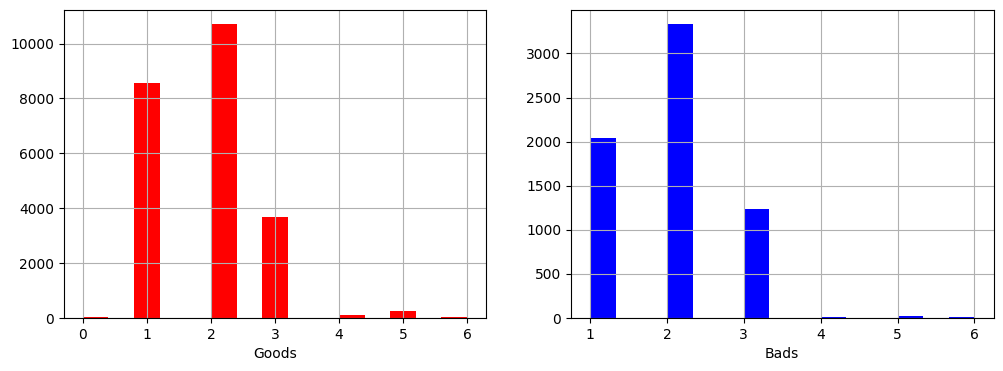

In [49]:
draw_dist_plot(good_clients['EDUCATION'], bad_clients['EDUCATION'],15)

There is no PhD among bads. The biggest share of non-returns is on Bachelor's Degree, it is logical, since most of the credits are taken by people with a bachelor's degree. The share of non-returns by people w/ Master's Degree is the 2nd as it is the folloeing credit receivers pool by volume.

In [50]:
education_lvl = ['phd','master','bachelor','hs_graduate','primary','others','no_info']

LEt us create a adjacency matrix with the number of people distibuted by all education levels in two subsamples.

In [56]:
adjacency_matrix = pd.DataFrame({u'negative': bad_clients.EDUCATION.value_counts(), \
                                 u'positive': good_clients.EDUCATION.value_counts()})
for i in range(0, 7):
    adjacency_matrix.rename(index={i: education_levels[i]}, inplace = True)
    
adjacency_matrix.iloc[0,0] = 0

In [57]:
adjacency_matrix

,negative,positive
phd,0.0,14
master,2036.0,8549
bachelor,3330.0,10700
hs_graduate,1237.0,3680
primary,7.0,116
others,18.0,262
no_info,8.0,43


To test the distributions of samples we will use the chi-square test.

H0:  the var has Poisson distribution
alpha = 0.05

In [59]:
stats.chi2_contingency(adjacency_matrix, correction = False)[1]

1.2332626245415605e-32

We reject H0.

EDUACION var is statistically significant

## Marriage

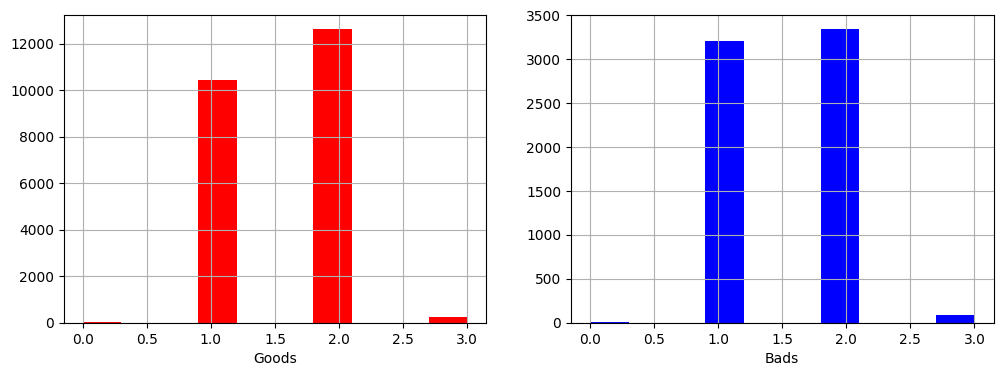

In [60]:
draw_dist_plot(good_clients['MARRIAGE'], bad_clients['MARRIAGE'],10)

Let's measure the correlation between the Marriage var and target Default using Cramer's V coefficient(it is chosen since we work with categorial variable)

In [61]:
def v_cramer(chi, n, shape):
    return np.sqrt(chi/n/(min(shape[0], shape[1])-1))

In [62]:
marrital_status = ['reject_to_answer', 'married', 'single', 'no_data']

In [64]:
adj_matrix_marriage = pd.DataFrame({u'positive': good_clients.MARRIAGE.value_counts(), \
                                 u'negative': bad_clients.MARRIAGE.value_counts()})
for i in range(0, 4):
    adj_matrix_marriage.rename(index={i: marrital_status[i]}, inplace = True)

In [65]:
adj_matrix_marriage

,positive,negative
single,12623,3341
married,10453,3206
no_data,239,84
reject_to_answer,49,5


In [68]:
v_cramer(stats.chi2_contingency(adj_matrix_marriage,correction=False)[0], len(raw_data), adj_matrix_marriage.shape)

0.034478203662766466

Cramer's V coefficient belongs to the range [0:1]. So, our value is too close to zero to considwr it in a model.
Conclusion: variable should not be included into scoring model

## Age

Histograms for both subsets look similar. We cannot make any conclusions or assumptions according to dependency_to_default_plot graph.

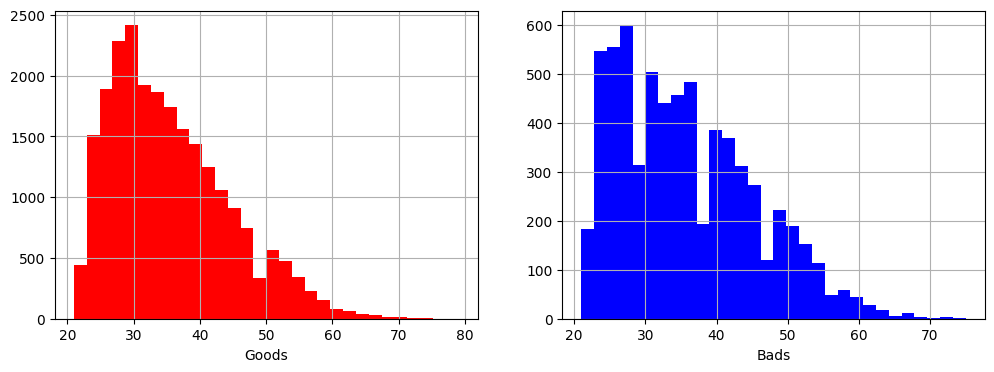

In [70]:
draw_dist_plot(good_clients['AGE'], bad_clients['AGE'],30)

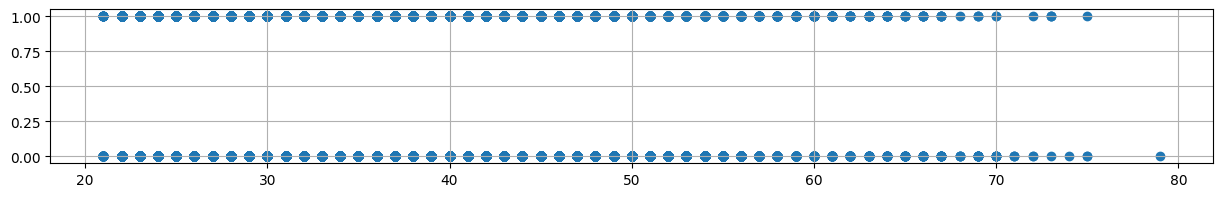

In [71]:
draw_dependency_to_default_plot(raw_data['AGE'])

Distribution is asymmetric so it is reasonable to use non-parametric criteria. As for the first observed var, Mann-Whitney rank test could be used.

H0: the samples came from identical distributions; 
H1: H0 is not the case. 
alpha = 0.05

In [72]:
stats.mannwhitneyu(good_clients['AGE'], bad_clients['AGE'])

MannwhitneyuResult(statistic=76966879.5, pvalue=0.3725035434898616)

H0 is accepted. The Age var should not be included into scoring model as it is statistically insignificant.